In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

In [5]:
df = pd.read_csv("../data/NN/train.csv")

data = df.values

print df.shape

(42000, 785)


In [7]:
data_length = 14000
split = int(0.85*data_length)

X_train = data[:split,1:]
X_val  = data[split:data_length,1:]

y_train = np_utils.to_categorical(data[:split,0])
y_val = np_utils.to_categorical(data[split:data_length,0])

print X_train.shape, X_val.shape
print y_train.shape, y_val.shape

(11900, 784) (2100, 784)
(11900, 10) (2100, 10)


In [8]:
model = Sequential()


model.add(Dense(512, input_shape=(784,)))
model.add(Activation("tanh"))


model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adagrad',metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
__________

In [10]:
hist = model.fit(X_train,y_train,
                shuffle=True,
                nb_epoch=50,
                batch_size=100,
                validation_data=(X_val,y_val))

Train on 11900 samples, validate on 2100 samples
Epoch 1/50
 3700/11900 [========>.....................] - ETA: 0s - loss: 0.3521 - acc: 0.8903

/home/cheeku/anaconda2/envs/ml/lib/python2.7/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


11900/11900 [==============================] - 1s 47us/step - loss: 0.3237 - acc: 0.8980 - val_loss: 0.3375 - val_acc: 0.8929
Epoch 2/50
11900/11900 [==============================] - 1s 46us/step - loss: 0.2749 - acc: 0.9124 - val_loss: 0.3015 - val_acc: 0.9067
Epoch 3/50
11900/11900 [==============================] - 1s 47us/step - loss: 0.2358 - acc: 0.9274 - val_loss: 0.2794 - val_acc: 0.9138
Epoch 4/50
11900/11900 [==============================] - 1s 54us/step - loss: 0.2029 - acc: 0.9350 - val_loss: 0.2733 - val_acc: 0.9100
Epoch 5/50
11900/11900 [==============================] - 1s 46us/step - loss: 0.1828 - acc: 0.9400 - val_loss: 0.2430 - val_acc: 0.9219
Epoch 6/50
11900/11900 [==============================] - 1s 47us/step - loss: 0.1703 - acc: 0.9466 - val_loss: 0.2222 - val_acc: 0.9271
Epoch 7/50
11900/11900 [==============================] - 1s 54us/step - loss: 0.1550 - acc: 0.9513 - val_loss: 0.2095 - val_acc: 0.9305
Epoch 8/50
11900/11900 [============================

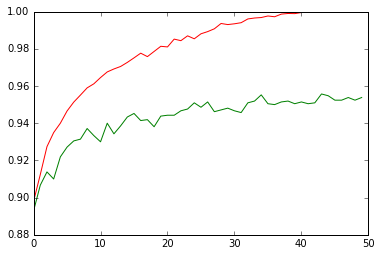

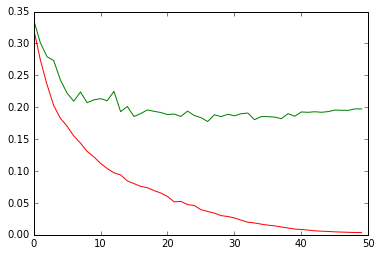

In [12]:
plt.figure(0)
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'g')


plt.figure(1)
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'g')
